In [1]:
import os
from time import time
import re
import utils
from utils import add_neuron_subdir, add_trial_subdir
import utils
import numpy as np
from scipy import stats
import h5py
from cv2 import imread, imwrite
import matplotlib.pylab as plt

In [5]:
homedir = r"D:\Generator_DB_Windows" #os.path.expanduser('~')
exp_dir = os.path.join(homedir, 'data/with_CNN')
neuron = ('caffe-net', 'fc8', 1)
this_exp_dir = add_neuron_subdir(neuron, exp_dir)

In [ ]:
for i in range(1):
    trial_title = 'choleskycma_norm_trial%d' % (i)
    trial_dir = add_trial_subdir(this_exp_dir, trial_title)
    h = h5py.File(os.path.join(trial_dir, 'Activation_Summary.hdf5'))
#%%
act_patt_fc8 = h["fc8"]
act_patt_fc7 = h["fc7"]
#%%

## fc8 correlation

In [6]:
corr_coef = []
for i in range(act_patt_fc8.shape[1]):
    corr_coef.append(np.corrcoef(act_patt_fc8[:,1], act_patt_fc8[:,i])[0,1])
corr_coef = np.array(corr_coef)
#%%

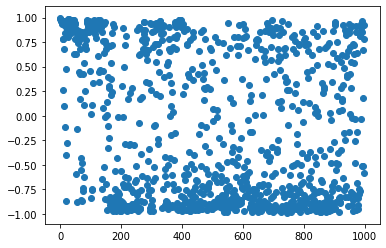

In [7]:
plt.figure()
plt.scatter(np.arange(1000), corr_coef)
plt.show()

In [56]:
"""Read the 1000 categories into label_dict"""
label_txt_file = r"D:\Generator_DB_Windows\nets\caffenet\imagenet1000_clsidx_to_labels.txt"
with open(label_txt_file, 'r') as file:
    labels_str = file.read().replace('\n', '')
exec("label_dict = "+labels_str)

In [60]:
indx = np.argsort(-corr_coef) # decreasing order

In [72]:
for i in range(50):
    print("Rank %d cc: %.3f activation: %.1f: #%d  %s "%(i+1,corr_coef[indx[i]], act_patt_fc8[-1,indx[i]],indx[i], label_dict[indx[i]]))

Rank 1 cc: 1.000 activation: 87.5: #1  goldfish, Carassius auratus 
Rank 2 cc: 0.990 activation: 48.3: #29  axolotl, mud puppy, Ambystoma mexicanum 
Rank 3 cc: 0.985 activation: 32.8: #27  eft 
Rank 4 cc: 0.984 activation: 33.9: #0  tench, Tinca tinca 
Rank 5 cc: 0.980 activation: 19.9: #130  flamingo 
Rank 6 cc: 0.980 activation: 21.3: #124  crayfish, crawfish, crawdad, crawdaddy 
Rank 7 cc: 0.980 activation: 25.2: #391  coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch 
Rank 8 cc: 0.979 activation: 30.4: #88  macaw 
Rank 9 cc: 0.979 activation: 30.9: #397  puffer, pufferfish, blowfish, globefish 
Rank 10 cc: 0.978 activation: 21.7: #394  sturgeon 
Rank 11 cc: 0.978 activation: 19.1: #40  American chameleon, anole, Anolis carolinensis 
Rank 12 cc: 0.978 activation: 26.5: #26  common newt, Triturus vulgaris 
Rank 13 cc: 0.977 activation: 18.8: #42  agama 
Rank 14 cc: 0.975 activation: 24.5: #38  banded gecko 
Rank 15 cc: 0.974 activation: 30.4: #392  rock beauty,

## fc7 feedforward correlation

In [ ]:
corr_coef_ff = []
for i in range(act_patt_fc7.shape[1]):
    corr_coef_ff.append(np.corrcoef(act_patt_fc8[:,1], act_patt_fc7[:,i])[0,1])
corr_coef_ff = np.array(corr_coef_ff)

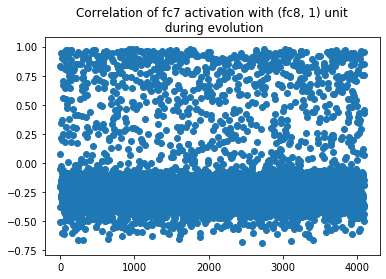

In [16]:
plt.figure()
plt.scatter(np.arange(act_patt_fc7.shape[1]), corr_coef_ff)
plt.title("Correlation of fc7 activation with (fc8, 1) unit\n during evolution")
plt.show()

In [33]:
fc8_weight = CaffeNet.params.get('fc8')[0].data
fc8_bias = CaffeNet.params.get('fc8')[1].data # for each output neuron

In [30]:
fc8_weight.shape

(1000, 4096)

C:\Users\ponce\.conda\envs\caffe36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
C:\Users\ponce\.conda\envs\caffe36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


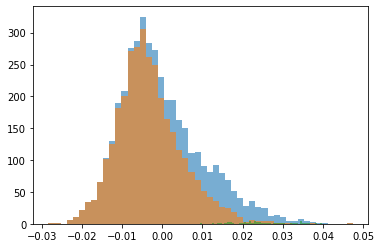

In [74]:
plt.hist(fc8_weight[1,:],alpha=0.6,bins=50)
plt.hist(fc8_weight[1,:][corr_coef_ff<0.1],alpha=0.6,bins=50)
plt.hist(fc8_weight[1,:][corr_coef_ff>0.95],alpha=0.6,bins=50)
plt.show()

In [46]:
fc8_weight[1,:][corr_coef_ff>0.90].mean()

C:\Users\ponce\.conda\envs\caffe36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


0.026190056

In [102]:
stats.ttest_ind(fc8_weight[1,:], fc8_weight[1,:][corr_coef_ff>0.6])

C:\Users\ponce\.conda\envs\caffe36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


Ttest_indResult(statistic=-28.841919812273943, pvalue=2.576475638818581e-168)

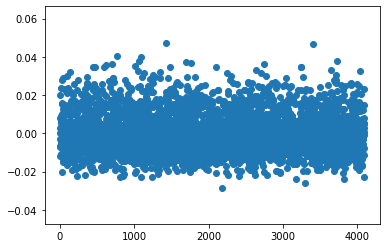

In [39]:
plt.scatter(np.arange(act_patt_fc7.shape[1]), fc8_weight[1,:])

In [8]:
import net_utils

In [9]:
CaffeNet = net_utils.load("caffe-net")

In [ ]:
plt.plot(np.corrcoef(act_patt_fc8[:,1])

## fc6 feedforward correlation

In [75]:
act_patt_fc6 = h["fc6"]

In [76]:
corr_coef_ff2 = []
for i in range(act_patt_fc6.shape[1]):
    corr_coef_ff2.append(np.corrcoef(act_patt_fc8[:,1], act_patt_fc6[:,i])[0,1])
corr_coef_ff2 = np.array(corr_coef_ff2)

C:\Users\ponce\.conda\envs\caffe36\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ponce\.conda\envs\caffe36\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


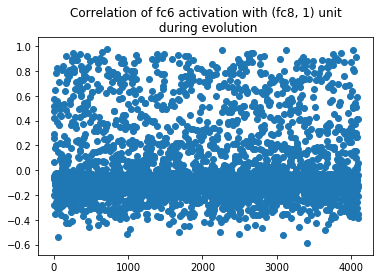

In [77]:
plt.figure()
plt.scatter(np.arange(act_patt_fc6.shape[1]), corr_coef_ff2)
plt.title("Correlation of fc6 activation with (fc8, 1) unit\n during evolution")
plt.show()

In [78]:
fc7_weight = CaffeNet.params.get('fc7')[0].data
fc7_bias = CaffeNet.params.get('fc7')[1].data # for each output neuron

In [82]:
compo_weight = fc8_weight @ fc7_weight

In [83]:
compo_weight[1,:]

array([ 0.00394948, -0.01182562, -0.005422  , ...,  0.00220494,
        0.01792608, -0.00472608], dtype=float32)

C:\Users\ponce\.conda\envs\caffe36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


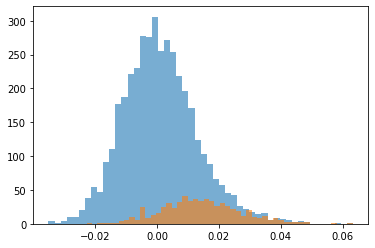

In [87]:
plt.hist(compo_weight[1,:], alpha=0.6,bins=50)
# plt.hist(compo_weight[1,:][corr_coef_ff2<0.1], alpha=0.6, bins=50)
plt.hist(compo_weight[1,:][corr_coef_ff2>0.2], alpha=0.6,bins=50)
plt.show()

In [103]:
stats.ttest_ind(compo_weight[1,:], compo_weight[1,:][corr_coef_ff2<0.5])

C:\Users\ponce\.conda\envs\caffe36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


Ttest_indResult(statistic=6.306145962129859, pvalue=3.0165571113246313e-10)

## conv5 feedforward correlation

Note for `Conv5` the layer has retinotopy and kernel dimension 

In [119]:
act_patt_conv5 = h["conv5"]

In [123]:
corr_coef_ff3 = np.zeros(act_patt_conv5.shape[1:])

In [126]:
corr_coef_ff3 = np.zeros(act_patt_conv5.shape[1:])
for i in range(act_patt_conv5.shape[1]):
    for j in range(act_patt_conv5.shape[2]):
        for k in range(act_patt_conv5.shape[3]):
            corr_coef_ff3[i,j,k]=np.corrcoef(act_patt_fc8[:,1], act_patt_conv5[:,i,j,k])[0,1]

C:\Users\ponce\.conda\envs\caffe36\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ponce\.conda\envs\caffe36\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [127]:
corr_coef_ff3.shape

(256, 13, 13)

In [128]:
kernel_cc = corr_coef_ff3.mean(axis=(1,2))

In [135]:
kernel_cc

array([-0.0616973 , -0.03004668,  0.17152352, -0.11643506, -0.13625689,
       -0.13280817,         nan, -0.07959852, -0.10029138, -0.02985827,
       -0.12701328,  0.01510726,         nan,  0.11192137,  0.08768225,
       -0.04589677, -0.06083   ,  0.05564084, -0.05200936, -0.07159809,
       -0.14172087, -0.28738023,  0.09936375, -0.09799714, -0.03030229,
       -0.12572009, -0.08524787,         nan,         nan,  0.03745323,
        0.01133891,         nan,  0.20491518,         nan, -0.00136222,
        0.03554412, -0.11717168, -0.07792257,  0.11015603, -0.00552333,
       -0.00142308, -0.10973322, -0.08113939, -0.12047491, -0.0644895 ,
        0.02222588, -0.07953684,         nan, -0.17868271,  0.04119575,
               nan, -0.16260559, -0.08763602, -0.08455014, -0.10814284,
       -0.08727268,         nan, -0.0393283 ,  0.1716512 , -0.11719194,
               nan, -0.1370922 ,         nan, -0.10371281, -0.10584986,
        0.01234073, -0.14543434, -0.10572703, -0.15585889, -0.01

In [109]:
from caffe import layers as L
from caffe import params as P

In [111]:
pool5 = L.Pooling(kernel_size=3, stride=2, pool=P.Pooling.MAX)

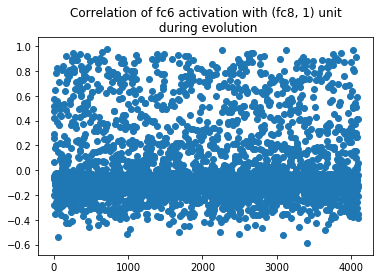

In [77]:
plt.figure()
plt.scatter(np.arange(act_patt_fc6.shape[1]), corr_coef_ff2)
plt.title("Correlation of fc6 activation with (fc8, 1) unit\n during evolution")
plt.show()

In [92]:
fc6_weight = CaffeNet.params.get('fc6')[0].data
fc6_bias = CaffeNet.params.get('fc6')[1].data # for each output neuron

In [130]:
fc6_tsr = fc6_weight.reshape(-1, 256, 6, 6 )

In [95]:
9216/256

36.0

In [132]:
compo_weight_conv = fc8_weight @ fc7_weight @ fc6_weight

In [133]:
compo_weight_tsr = compo_weight_conv[1, :].reshape(256, 6, 6)

In [134]:
compo_weight_tsr.mean(axis=(1,2))

array([-8.68475344e-03, -3.56874615e-03, -8.61745421e-03, -7.58410781e-04,
       -3.01939622e-03, -3.01248336e-04, -1.00745540e-02, -9.91707668e-03,
       -1.57791225e-03, -1.00500928e-02, -1.10903801e-02,  5.95493382e-03,
       -5.06241061e-03,  4.43975115e-03,  6.31119125e-03, -5.69765223e-04,
        2.66077486e-03,  1.97095331e-03,  4.85847704e-03, -1.72622513e-03,
       -1.19002433e-02,  4.35471395e-03,  2.36861015e-04, -6.56421203e-03,
       -7.59637682e-04, -7.38053583e-03,  7.49042863e-03,  2.51680962e-03,
       -9.94454883e-03,  6.43075863e-03,  3.02751944e-03, -1.23874703e-02,
        1.21111386e-02,  1.65184017e-03,  3.41833406e-03, -5.67594683e-03,
        2.56250915e-03, -3.75910848e-03,  2.11573136e-03,  2.35266257e-02,
       -1.43926521e-03, -7.55613204e-03, -5.74267143e-03,  6.61383662e-03,
       -1.52985938e-02,  9.33372881e-03,  1.38085047e-02, -4.74352972e-04,
        2.62824167e-02,  6.34370558e-03, -8.02498125e-03, -9.83569864e-03,
        1.32863250e-04,  

In [138]:
compo_weight_tsr.shape

(256, 6, 6)

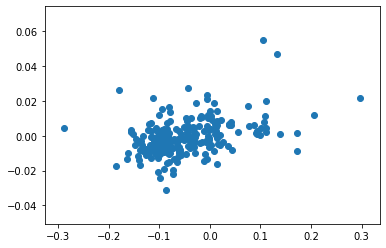

In [139]:
plt.scatter(kernel_cc, compo_weight_tsr.mean(axis=(1,2)))

In [140]:
fc8_weight

array([[ 1.60600990e-04, -1.03929928e-02, -1.31717985e-02, ...,
         3.87885096e-03, -1.38762705e-02, -4.16635629e-03],
       [-3.11234104e-03, -6.44944096e-03, -1.21174436e-02, ...,
         5.07852016e-03, -7.57331774e-03, -1.11373130e-03],
       [-6.44574582e-04, -6.00662432e-04,  1.53919104e-02, ...,
         7.89728761e-03, -1.81670561e-02, -5.57139143e-03],
       ...,
       [-1.05565996e-03, -7.59701291e-03, -1.49278548e-02, ...,
         5.83872723e-04, -1.03693679e-02, -9.81006958e-03],
       [ 8.52866471e-03, -1.58668347e-02,  2.74218146e-05, ...,
        -1.21846776e-02,  1.62114352e-02,  1.89537033e-02],
       [-1.92801724e-03, -1.83890958e-03,  1.05218422e-02, ...,
        -2.88145919e-03,  2.21516285e-02, -1.29042659e-02]], dtype=float32)